## 4-2. 스크래핑 결과 시각화하기 I - 해시코드 질문태그 빈도 시각화

- bs4와 Seaborn을 이용해서 질문의 주제 빈도를 보여주는 시각화를 진행해봅시다.

### Target: 해시코드 질문 태그의 빈도 확인

이전에 진행한 해시코드(https://hashcode.co.kr) 사이트에선 다양한 질문이 올라왔는데,  
질문제목 아래에 "태그"가 있었습니다.

이 태그의 빈도를 측정하면 어떤 주제의 질문이 많이 올라오는지 알 수 있을 것 같습니다.  
이를 스크래핑 후 시각화해봅시다.

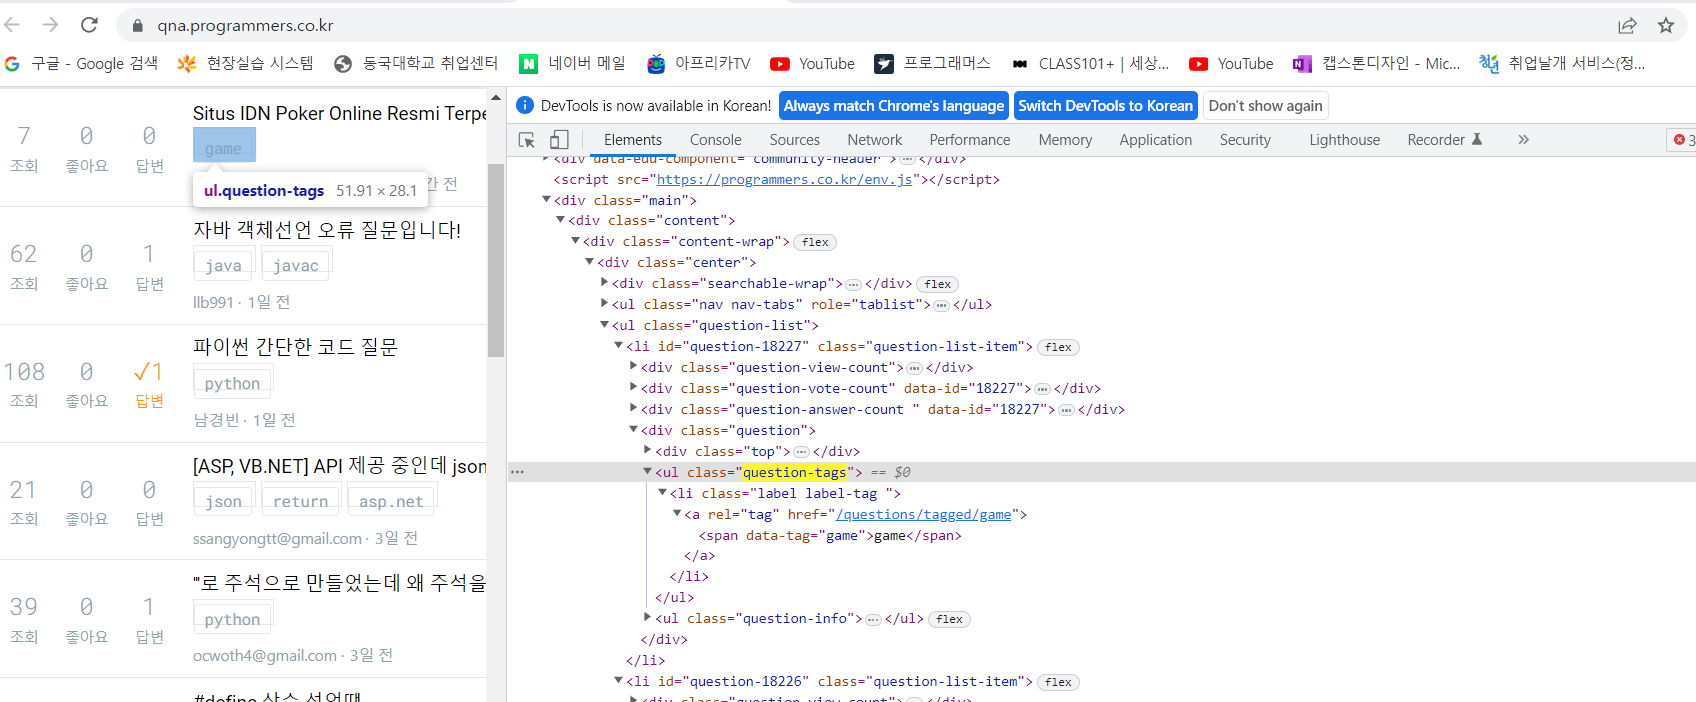

* 보면 태그가 ul 태그 `<question-tags>`안에 있는것을 확인할 수있다

In [1]:
# 다음 User-Agent를 추가해봅시다.

user_agent = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36"}

In [3]:
# 필요한 라이브러리를 불러온 후, 요청을 진행해봅시다.

import requests
from bs4 import BeautifulSoup

res = requests.get("https://hashcode.co.kr")
soup = BeautifulSoup(res.text, "html.parser")

# 1. ul 태그를 모두 찾기
# 2. 1번 안에 있는 li xormdml text를 추출

ul_tags = soup.find_all("ul")
for ul in ul_tags:
    print(ul.text)


최신
인기
답변 필요
태그 선택




7
조회


0
좋아요


0
답변



Situs IDN Poker Online Resmi Terpercaya Indonesia




game
 


jindanalexsa77@gmail.com
16시간 전





62
조회


0
좋아요


1
답변



자바 객체선언 오류 질문입니다!




java
 


javac
 


llb991
1일 전





108
조회


0
좋아요


✓1
답변



파이썬 간단한 코드 질문




python
 


남경빈
1일 전





21
조회


0
좋아요


0
답변



[ASP, VB.NET] API 제공 중인데 json 값 앞에 태그가 붙은 이유가 뭘까요?




json
 


return
 


asp.net
 


ssangyongtt@gmail.com
3일 전





39
조회


0
좋아요


1
답변



'''로 주석으로 만들었는데 왜 주석을 지우지 않으면 유니코드오류가 왜 나는지 모르겠어여




python
 


ocwoth4@gmail.com
3일 전





77
조회


0
좋아요


1
답변



#define 상수 선언떄




c
 


gurtmd3323@gmail.com
4일 전





51
조회


0
좋아요


0
답변



우분투 vmware 가상머신 오류




ubuntu
 


vmware
 


코린이이
13일 전





88
조회


0
좋아요


1
답변



파이썬 멀티스레딩 질문




python
 


multithreading
 


길태호
15일 전





56
조회


0
좋아요


1
답변



파이썬 엑셀 파일 읽기




python
 


eriny
17일 전





72
조회


0
좋아요


1
답변



머쓱이 스탬프 할때 답보기요


앤디
20일 전





58
조회


0
좋아요


1
답변



BFS를 사용해도 무관한지 궁금합니다!




algorithm
 


cod

이렇게 하면 안되고 ul중에서도 question-tags라는 클래스를 가져야 하니까 find_all함수 인자에  
,"question-tags"를 추가한다!

In [6]:
ul_tags = soup.find_all("ul","question-tags")
for ul in ul_tags:
    print(ul.find("li").text.strip())

game
java
python
json
python
c
ubuntu
python
python
algorithm
python
react
javascript
java
python
node.js
python
python
multiprocessing
c
html
application-development
python
logistic-regression
java
pandas
python
python
java
python
java
python
windows
for
python
c
c
java
javascript
javascript
regex
algorithm
python
javascript
python
python


이제 10페이지의 태그를 가져와보도록 하자!  
<br>
frquency라는 dict를 만들어서 빈도를 세보겠다는 말이다!

In [13]:
frequency = {}
for i in range(1,11):
    res = requests.get(f"https://hashcode.co.kr/?page={i}",user_agent)
    soup = BeautifulSoup(res.text, "html.parser")
    ul_tags = soup.find_all("ul","question-tags")

    for ul in ul_tags:
        tag = ul.find("li").text.strip()
        if tag not in frequency:
            frequency[tag] = 1
        else:
            frequency[tag] += 1
        time.sleep(0.5)

In [14]:
# 응답을 바탕으로 BeautifulSoup 객체를 생성해봅시다.

frequency

{'game': 1,
 'java': 34,
 'python': 196,
 'json': 1,
 'c': 39,
 'ubuntu': 2,
 'algorithm': 3,
 'react': 5,
 'javascript': 11,
 'node.js': 4,
 'multiprocessing': 1,
 'html': 10,
 'application-development': 1,
 'logistic-regression': 1,
 'pandas': 9,
 'windows': 2,
 'for': 5,
 'regex': 1,
 'mfc': 1,
 'django': 4,
 'c++': 15,
 'array': 2,
 'hashcode': 1,
 'kotlin': 3,
 'image': 2,
 'directory': 1,
 'raspberry-pi': 1,
 'vb.net': 1,
 'html5': 1,
 'sql': 2,
 'data': 1,
 'dijkstra': 1,
 'pip': 1,
 'terminal': 1,
 'mysql': 2,
 'switch문': 1,
 'c#': 4,
 'ejs': 1,
 'vscode': 3,
 'recursion': 1,
 'dataframe': 3,
 'database': 1,
 'tkinter': 1,
 'thread': 1,
 'foreach': 2,
 'unix': 1,
 'csv': 2,
 'error': 4,
 'gui': 1,
 'coding': 1,
 'python3': 7,
 'testing': 1,
 'c++표준': 1,
 'postfix': 1,
 'method': 1,
 'coding-test': 1,
 'import-에러': 1,
 'assembly': 1,
 'excel': 1,
 'input': 1,
 'ajax': 1,
 'crypto': 1,
 'init': 1,
 'web-crawling': 2,
 'eclipse': 2,
 'rstudio': 1,
 'selenium-webdrive': 3,
 'arduin

In [33]:
# Counter를 사용해 가장 빈도가 높은 value들을 추출합니다.

from collections import Counter

counter = Counter(frequency)

top10 = counter.most_common(10)

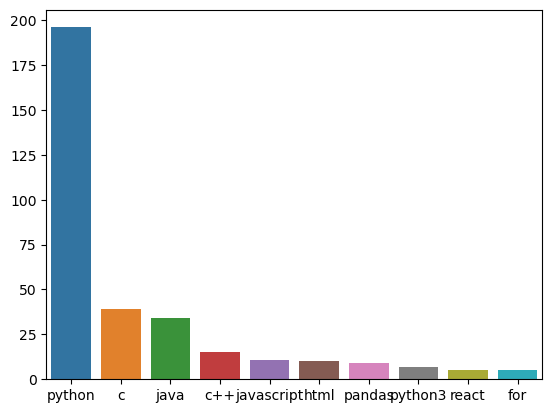

In [47]:
# Seaborn을 이용해 이를 Barplot으로 그립니다.
import seaborn as sns
sns.barplot(
    x = [top10[k][0] for k in range (len(top10))], 
    y = [top10[k][1] for k in range (len(top10))]
)
plt.show()

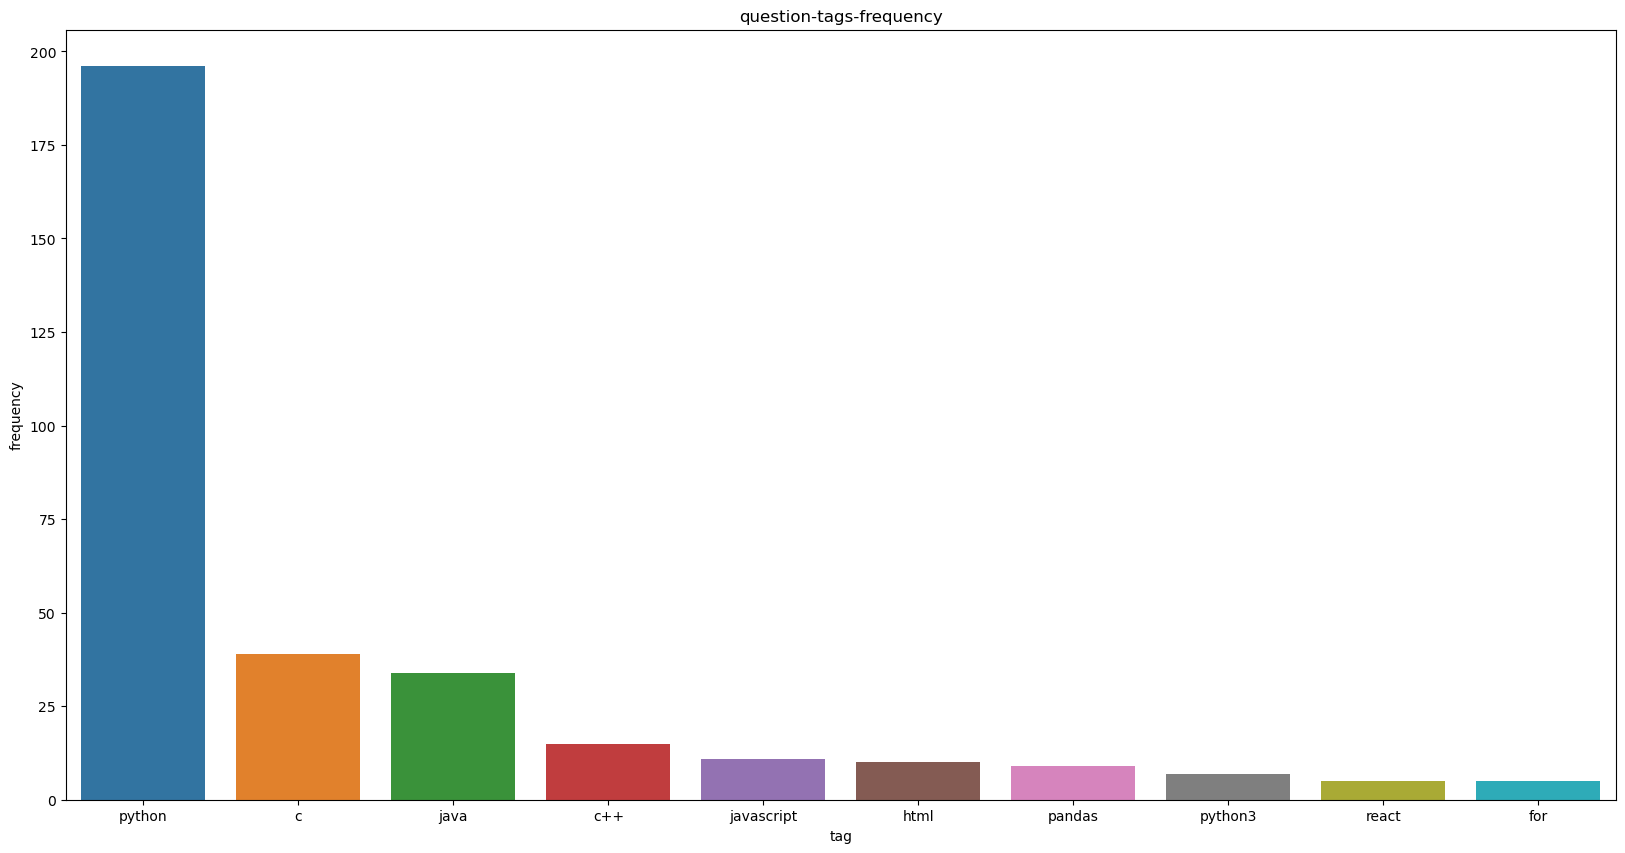

In [46]:
# figure, xlabel, ylabel, title을 적절하게 설정해서 시각화를 완성해봅시다.

import matplotlib.pyplot as plt

plt.figure(figsize = (20,10))
plt.xlabel("tag")
plt.ylabel("frequency")
plt.title("question-tags-frequency")
sns.barplot(
    x = [top10[k][0] for k in range (len(top10))], 
    y = [top10[k][1] for k in range (len(top10))]
)
plt.show()

강사님이 사용한 방법(리스트 컴프레헨션) 이게 더 편해보인다

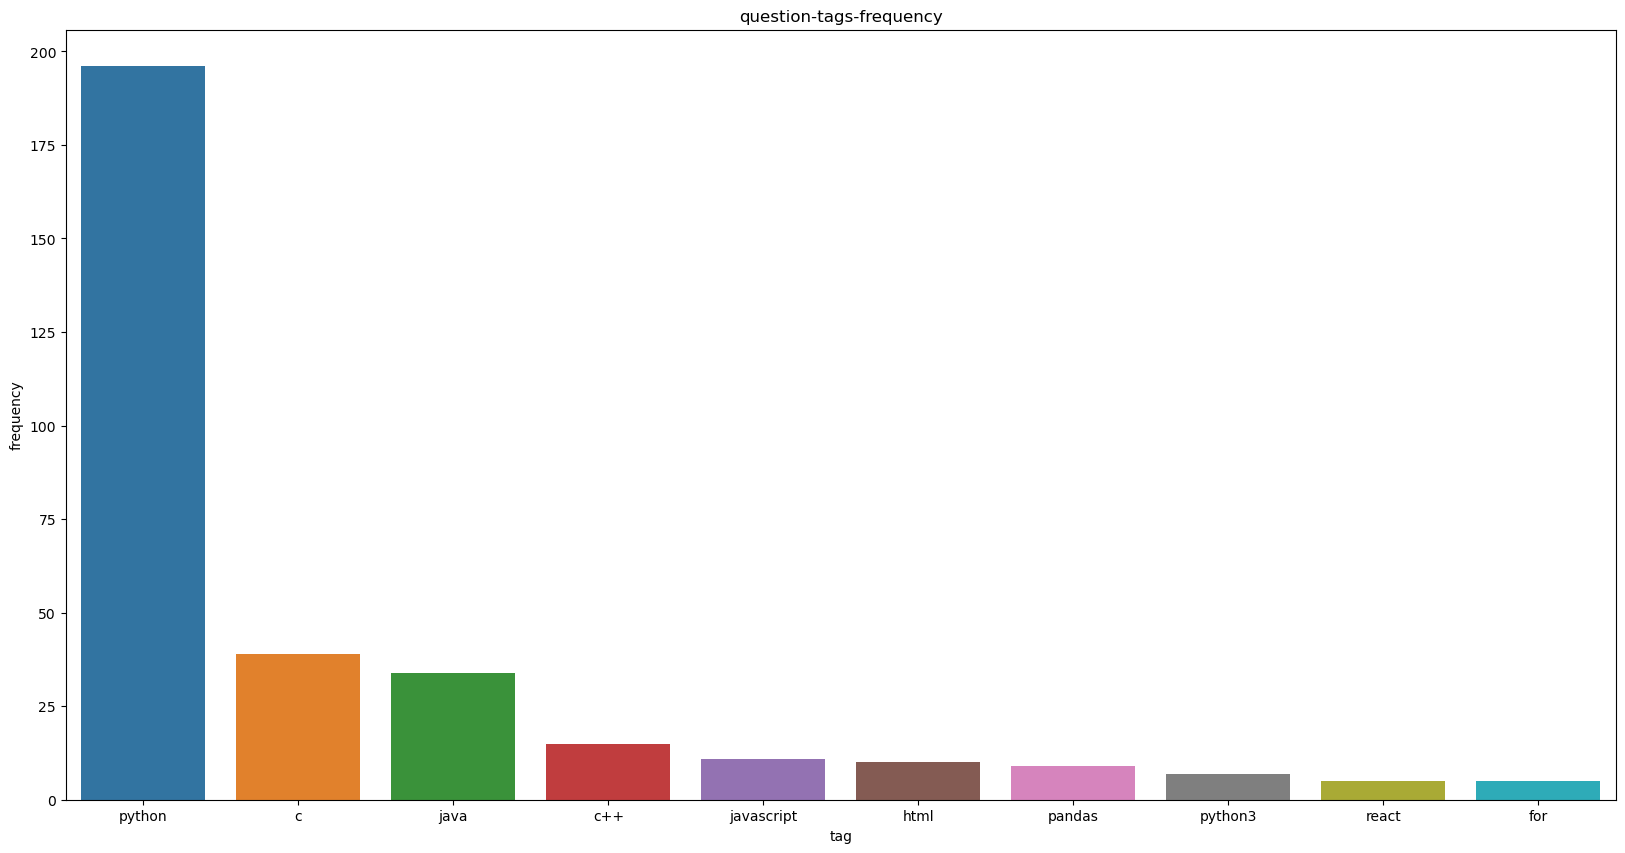

In [45]:
x = [elem[0] for elem in counter.most_common(10)]
y = [elem[1] for elem in counter.most_common(10)]

import matplotlib.pyplot as plt

plt.figure(figsize = (20,10))
plt.xlabel("tag")
plt.ylabel("frequency")
plt.title("question-tags-frequency")
sns.barplot(
    x = x, y = y
)
plt.show()